# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \overline{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    
    #Se realiza la descomposición svd
    u, s, vh = svd(A)
    
    #Se guarda la dimensión de la matriz y se toma el mínimo
    row, col =A.shape
    minrc = min(row,col) 
    
    #Se reconstruye la descomposición SVD
    Asvd = 0
    for i in range(minrc):
        Asvd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    
    return np.allclose(A,Asvd)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

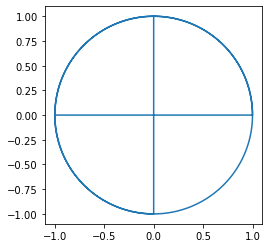

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


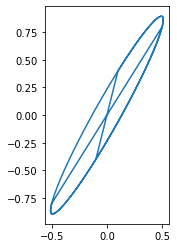

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

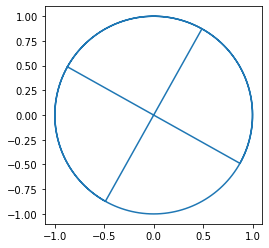

In [11]:
show_circle(u @ circle)

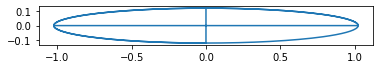

In [12]:
show_circle(np.diag(s) @ circle)

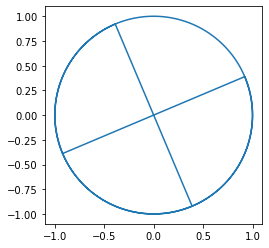

In [13]:
show_circle(vh @ circle)

__Respuesta:__ Son rotaciones de la circunferencia unitaria. Si influye, pues en caso contrario existiría contracción o dilatación de los ejes como en el caso 2

__Respuesta:__ Es una descomposición de las trasformaciones que se le realizan a la circunferencia unitaria

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

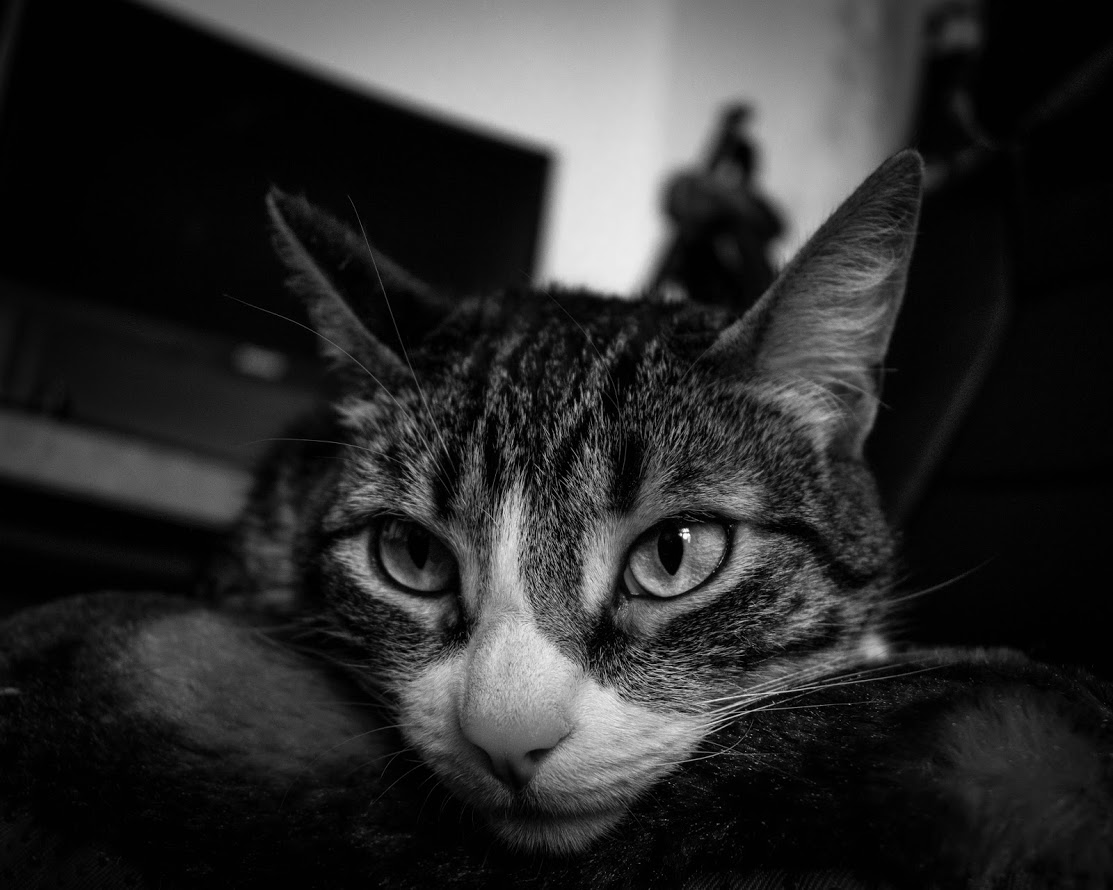

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
from scipy.linalg import norm
def low_rank_svd_approximation(A, l):
    
    #Se obtiene el tamaño de la matriz y se toma el mínimo
    row, col = A.shape
    minrc = min(row,col)
    
    #Se verifica que el parámetro l sea válido
    if l > minrc:
        print("El valor de la segunda entrada es inválido")
        return
    
    #Se obtiene la descomposición SVD
    u, s , vh = svd(A)
    
    #Se realiza la aproximación y se imprime el error en la norma de Frobenius
    Asvd = 0
    for i in range(l):
        Asvd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    print(norm(A-Asvd,'fro'))
    
    return Asvd

16040.934


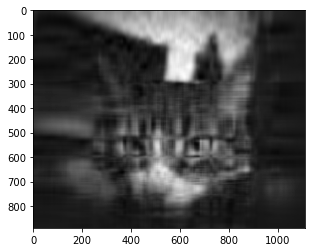

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

8141.883


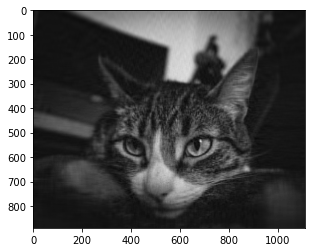

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [20]:
u, s , vh = svd(A)
s[0:2]**2
range(1,4+1)

range(1, 5)

In [21]:
def low_rank_svd_tol_approximation(A, tol):
    
    # Se busca r
    row, col = A.shape
    r = min (row, col)
    
    # Se obtiene la descompsición SVD
    u, s , vh = svd(A)
    
    # Se busca el mayor rango aproximado
    for i in range(1,r+1):
        err = (s[i+1:r+1]**2).sum()/(s[0:r+1]**2).sum()
        if err <= tol:
            l = i
            print ("El mayor rango aproximado de A, con tolerancia " + str(tol) + " es " + str(l) )
            break
            
    # Se obtiene la aproximación de A
    Asvd = 0
    for i in range(l):
        Asvd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    return A

El mayor rango aproximado de A, con tolerancia 0.1 es 4


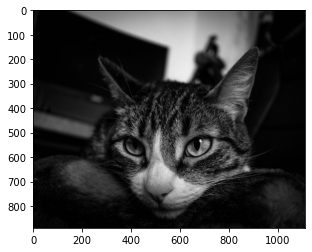

In [22]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El mayor rango aproximado de A, con tolerancia 0.01 es 63


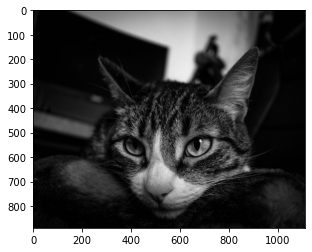

In [23]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

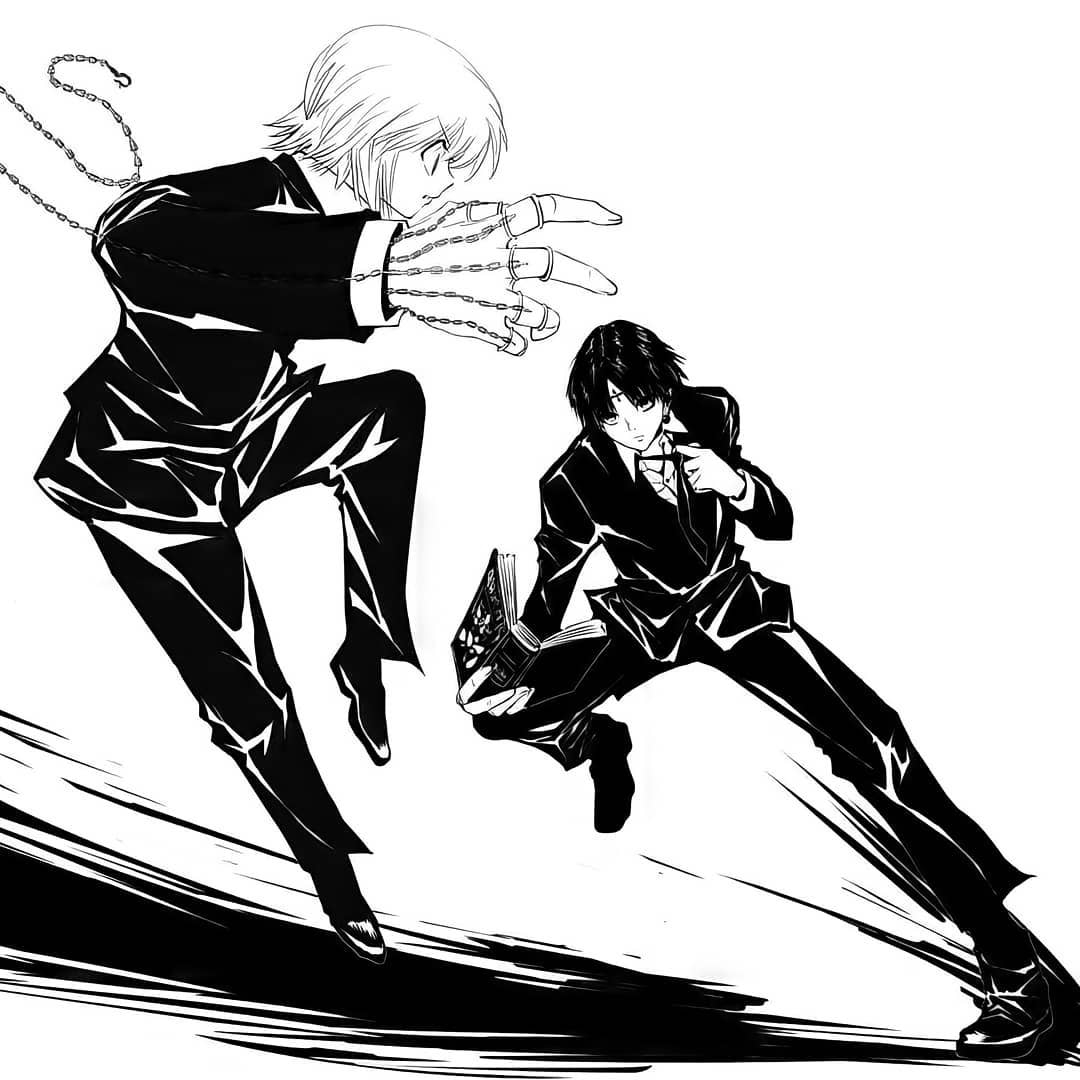

In [24]:
your_img_name = "im2.jpg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img


In [25]:
your_img_np = np.array(your_img)

56569.824


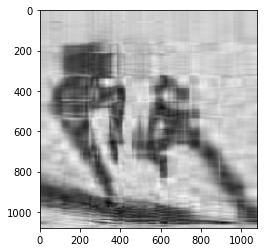

In [26]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

46244.137


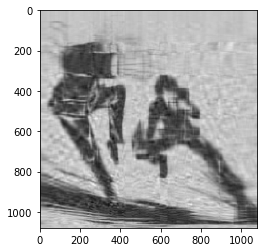

In [27]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El mayor rango aproximado de A, con tolerancia 0.1 es 4


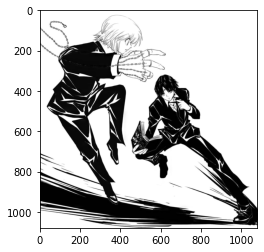

In [28]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El mayor rango aproximado de A, con tolerancia 0.01 es 93


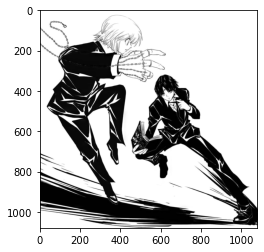

In [29]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ NO C XD

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [30]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador simple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [31]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [32]:
#esta va
start_date = pd.to_datetime("2020-10-1", format='%Y-%m-%d')
end_date = pd.to_datetime("2020-10-11", format='%Y-%m-%d')

In [33]:
covid_tasa_promedio_nuevos = (
    
    #Se eliminan los registros con codigo de comuna nulo
    covid_comunas.loc[lambda x: x["codigo_comuna"].notnull()]
    
    #Se rellena con 0 las fechas que tienen como entrada 0 en algún registro
    .apply(lambda x: x.fillna(0) if x.name[0:4] == "2020" else x.values)
    
    #Se reduce el dataframe y se apila las columnas asociadas a las fechas en las columnas fecha y casos totales
    .melt( 
        id_vars=["region", "comuna", "poblacion"], 
        value_vars=covid_comunas.columns[5:66],
        var_name='fecha', 
        value_name='casos_totales')
    
    #Se transforman las fechas en string y se ordenan
    .astype({"fecha" : "datetime64[ns]"})
    .sort_values("fecha")
    
    #Se agrega la columna casos_nuevos con la información que la variable indica
    .assign(
        casos_nuevos= lambda df: df.groupby("comuna")["casos_totales"].transform(lambda x: x-x.shift())
    )
    
    #Se filtran las fechas
    .loc[lambda df: (df["fecha"] >= start_date) & (df["fecha"] <= end_date)] 
    
    #Se define la columna promedio casos nuevos
    .assign(
        promedio_casos_nuevos= lambda df: df.groupby(["comuna","region"])["casos_nuevos"].transform(lambda x: x.mean())
    )
    
    # Se define la columna promedio casos nuevos
    .assign(
        tasa_casos_nuevos= lambda df: df["promedio_casos_nuevos"]/df["poblacion"]*100000
    )
    
    #Se ordenan en orden desendiente de la tasa_casos_nuevos
    .sort_values("tasa_casos_nuevos",ascending=False)
    
    #Se reducen las filas innecesarias y las columnas innecesarias
    .drop_duplicates(subset=["comuna"])
    .drop(columns=["fecha","casos_nuevos","casos_totales"])
)

In [34]:
covid_tasa_promedio_nuevos

,region,comuna,poblacion,promedio_casos_nuevos,tasa_casos_nuevos
19374,Magallanes,Timaukel,282.0,3.333333,1182.033097
20065,Magallanes,San Gregorio,681.0,4.000000,587.371512
19367,Magallanes,Laguna Blanca,264.0,1.333333,505.050505
20061,Magallanes,Porvenir,7323.0,34.333333,468.842460
20063,Magallanes,Punta Arenas,141984.0,631.333333,444.651040
...,...,...,...,...,...
19677,Los Lagos,Curaco de Velez,4066.0,0.000000,0.000000
19681,Los Lagos,Futaleufu,2806.0,0.000000,0.000000
19707,Aysén,Lago Verde,920.0,0.000000,0.000000
19520,O’Higgins,Lolol,7289.0,0.000000,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Son los que menor población tienen

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [35]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351
5,Valparaíso,5,1960170,301.0,249.0,248.0,273.0,223.0,92.0,385.0,...,3094,3257,3185,3309,2640,1410,1798,2740,3285,2612
6,Metropolitana,13,8125072,5383.0,3185.0,2105.0,3861.0,1850.0,1656.0,2694.0,...,11451,12030,13020,12669,13041,5081,6485,11546,12089,13772
7,O’Higgins,6,991063,68.0,NaN,74.0,NaN,74.0,30.0,30.0,...,1323,1537,1595,1435,1315,692,655,1490,1428,1469
8,Maule,7,1131939,397.0,219.0,NaN,341.0,113.0,160.0,NaN,...,1494,1916,2264,2327,1588,640,746,1567,1929,1897
9,Ñuble,16,511551,364.0,NaN,259.0,189.0,65.0,NaN,NaN,...,929,1150,1032,1054,971,981,536,1144,948,1080


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [36]:
covid_pcr_melt = (
    
    #Se definen las columnas fecha y nm_pcr manteniendo la columna región
    covid_pcr.melt( 
        id_vars=["region"], 
        value_vars=covid_pcr.columns[3:201],
        var_name='fecha', 
        value_name='nm_pcr')
    
    #Se cambia el tipo de los datos en la columna fecha
    .astype({"fecha" : "datetime64[ns]"})
    
    #Se rellena los valores nulos por cero en nm_pcr
    .apply(lambda x: x.fillna(0) if x.name == "nm_pcr" else x.values)
    
)

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3163,Araucanía,2020-10-23,2377.0
3164,Los Ríos,2020-10-23,760.0
3165,Los Lagos,2020-10-23,4254.0
3166,Aysén,2020-10-23,342.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_casos` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [37]:
covid_casos_melt = (
    
    #Se crean las columnas fecha y casos_totales mantiendo la columna region
    covid_comunas.melt(id_vars=["region"], 
        value_vars=covid_comunas.columns[5:66],
        var_name='fecha', 
        value_name='casos_totales')
    
    #Se rellenan los valores nulos con 0 en la columna_casos _totales
    .apply(lambda x: x.fillna(0) if x.name == "casos_totales" else x.values)
    
    #Se redefine la columna columna casos_totales como los casos totales dada una fecha y región
    .assign(
        casos_totales= lambda df: df.groupby(["region","fecha"])["casos_totales"].transform(lambda x: x.sum())
    )
    
    #Se cambia el tipo de los datos de la columna fecha
    .astype({"fecha" : "datetime64[ns]"})
    
    #Se elimina la información sobrante 
    .drop_duplicates(subset=["region","fecha"])
)

covid_casos_melt

,region,fecha,casos_totales
0,Arica y Parinacota,2020-03-30,6.0
5,Tarapacá,2020-03-30,5.0
13,Antofagasta,2020-03-30,29.0
23,Atacama,2020-03-30,0.0
33,Coquimbo,2020-03-30,21.0
...,...,...,...
21982,Araucanía,2020-10-19,10572.0
22015,Los Ríos,2020-10-19,2958.0
22028,Los Lagos,2020-10-19,13288.0
22059,Aysén,2020-10-19,908.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [38]:
covid_corr_casos_pcr = (
    
    #Se unen los registros
    covid_pcr_melt.merge(covid_casos_melt, how="outer", on=["region", "fecha"])
    
    #Se cambian los valores N.A. de la columna nm_pcr por 0
    .apply(lambda x: x.fillna(0) if x.name == "nm_pcr" else x.values)
    
    #Se aplica ffill a la columna casos_totales 
    .apply(lambda x: x.ffill() if x.name == "casos_totales" else x.values)
    
    #Se calculan las matrices de correlación por región
    .groupby("region")[["nm_pcr","casos_totales"]].apply(lambda grp: grp.corr())
    
    #Se elimina la información sobrante
    .loc[(slice(None),"nm_pcr"),"casos_totales"]
    .reset_index(level=1, drop=True)
    
    #Se ordena de manera ascendente
    .sort_values()
)

covid_corr_casos_pcr

region
Metropolitana         0.321107
Valparaíso            0.521465
Antofagasta           0.536491
Atacama               0.597920
Biobío                0.620768
Aysén                 0.636415
O’Higgins             0.641644
Tarapacá              0.663975
Maule                 0.672944
Magallanes            0.680736
Ñuble                 0.692456
Los Lagos             0.710951
Los Ríos              0.716713
Coquimbo              0.743588
Arica y Parinacota    0.788894
Araucanía             0.826001
Name: casos_totales, dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Para cada comuna de la región metropolitana, comparar la curva de contagios confirmados con la curva de transacciones en el sistema bip. Considerando que es usual que los síntomas se manifiesten a los 6 o 7 días ¿Es coherente al contrastarlo con la información obtenida? 

__Respuesta:__

Primero importaremos la información que necesitamos

In [39]:
trans_bip = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto41/BIPComuna_std.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

display(covid_comunas.head(),
        trans_bip.head())

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


,comuna,codigo_comuna,transacciones,fecha
0,Cerrillos,13102.0,18365.0,2020-03-01
1,Cerrillos,13102.0,55826.0,2020-03-02
2,Cerrillos,13102.0,57927.0,2020-03-03
3,Cerrillos,13102.0,58642.0,2020-03-04
4,Cerrillos,13102.0,57773.0,2020-03-05


Para evitar problemas al cruzar los datos, estos los agruparemos por semanas utilizando las semanas epidemológicas definidas por el MINSAL disponibles en su repositorio GitHub.

In [40]:
sem_epi = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/InformeEpidemiologico/SemanasEpidemiologicas.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .T
    .iloc[1:]
    .rename(columns={0: "Inicio", 1:"Final"})
    .astype({"Inicio" : "datetime64[ns]", "Final" : "datetime64[ns]" })
)

sem_epi.head()

,Inicio,Final
se1,2019-12-29,2020-01-04
se2,2020-01-05,2020-01-11
se3,2020-01-12,2020-01-18
se4,2020-01-19,2020-01-25
se5,2020-01-26,2020-02-01


Primero trabajaremos unicamente con el data frame covid_comunas, a este le aplicaremos los siguiente
1. Eliminaremos los valores con registro de comuna nulo y los valores fuera de la región metropolitana
2. Llenaremos los registros de valores nulos con cero para los casos por fechas
3. Eliminaremos los registros fuera de la región metropolitana
4. Aplicaremos la función melt para reducir las columnas de las fechas a 2 columnas, fechas y casos_totales
5. Cambiaremos el tipo de la fecha a datatime64 
6. Agruparemos por comuna para reorganizar la información a periodos semanales

Previo a esto definiremos una función que nos será de utilidad para el último paso

In [41]:
#La función nos permitirá identificar a que semana epidemológica corresponde cada dato
def id_semana(x,sem_epi = sem_epi):
    for semana in sem_epi.T:
        if sem_epi["Inicio"][semana] <= x <= sem_epi["Final"][semana]:# >= x[indx]:
            return int(semana[2:])
    return None

In [42]:
covid_stgo = (

    #Se eliminan los registros con codigo de comuna nulo
    covid_comunas.loc[lambda x: (x["codigo_comuna"].notnull()) & (x["region"]== "Metropolitana")]
    
    #Se rellena con 0 las fechas que tienen como entrada 0 en algún registro
    .apply(lambda x: x.fillna(0) if x.name[0:4] == "2020" else x.values)
    
    #Se reduce el dataframe y se apila las columnas asociadas a las fechas en las columnas fecha y casos totales
    .melt( 
        id_vars=["comuna", "poblacion"], 
        value_vars=covid_comunas.columns[5:66],
        var_name='fecha', 
        value_name='casos_totales')
    
    #Se transforman las fechas en string y se ordenan
    .astype({"fecha" : "datetime64[ns]"})
    .sort_values("fecha")
    
    #Se cambia el formato de la columna fecha
    .astype({"fecha" : "datetime64[ns]"})
    
    #Se agrega la columna casos_nuevos con la información que la variable indica
    .assign(
        casos_nuevos= lambda df: df.groupby("comuna")["casos_totales"].transform(lambda x: x-x.shift())
    )
    
    #Se define la columnas semana_epi y se agrupa la información casos_totales y casos_nuevos en torno a esta y comunas 
    .assign(
        semana_epi = lambda df: df["fecha"].apply(lambda x: id_semana(x)),
        casos_totales = lambda df: df.groupby(["comuna","semana_epi"])["casos_totales"].transform(lambda x: x.sum()),
        casos_nuevos = lambda df: df.groupby(["comuna","semana_epi"])["casos_nuevos"].transform(lambda x: x.sum())
    )
    
    #Se elimina la información restante
    .drop_duplicates(subset=["comuna","semana_epi"])
    .drop(columns=["fecha"])
    
)

covid_stgo.sort_values(["comuna","semana_epi"])#.get#.unique()#.get_group("Santiago")


,comuna,poblacion,casos_totales,casos_nuevos,semana_epi
0,Alhue,7405.0,0.0,0.0,14
156,Alhue,7405.0,0.0,0.0,15
312,Alhue,7405.0,0.0,0.0,16
468,Alhue,7405.0,0.0,0.0,17
572,Alhue,7405.0,0.0,0.0,18
...,...,...,...,...,...
2755,Vitacura,96774.0,3391.0,35.0,39
2859,Vitacura,96774.0,3451.0,17.0,40
2963,Vitacura,96774.0,3502.0,31.0,41
3067,Vitacura,96774.0,3546.0,18.0,42


Ahora exploraremos el data frame trans_bip


In [43]:
display(trans_bip.info(), trans_bip["comuna"].unique())
ty_fecha =type(trans_bip["fecha"][0])
print (f"\n El formato de la columna fecha es, {ty_fecha}.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   comuna         2620 non-null   object 
 1   codigo_comuna  2554 non-null   float64
 2   transacciones  2620 non-null   float64
 3   fecha          2620 non-null   object 
dtypes: float64(2), object(2)
memory usage: 82.0+ KB


None

array(['Cerrillos', 'Cerro Navia', 'Conchalí', 'El Bosque',
       'Estación Central', 'Huechuraba', 'Independencia', 'La Cisterna',
       'La Florida', 'La Granja', 'La Pintana', 'La Reina', 'Las Condes',
       'Lo Barnechea', 'Lo Espejo', 'Lo Prado', 'Macul', 'Maipú', 'Ñuñoa',
       'Pedro Aguirre Cerda', 'Peñalolén', 'Providencia', 'Pudahuel',
       'Puente Alto', 'Quilicura', 'Quinta Normal', 'Recoleta', 'Renca',
       'San Bernardo', 'San Joaquín', 'San Miguel', 'San Ramón',
       'Santiago', 'Vitacura', '-'], dtype=object)


 El formato de la columna fecha es, <class 'str'>.


Lo que haremos a continuación será lo siguiente
1. Cambiar el formato de la columna fecha 
2. Agrupar los datos por semana



In [44]:
trans_covid = (
    
    #Se cambia el formato de la fecha
    trans_bip.astype({"fecha" : "datetime64[ns]"})
    
    #Se agrupa la información de las transacciones según las semanas epidemológica (info que se define en semana_epi)
    .assign(
        semana_epi = lambda df: df["fecha"].apply(lambda x: id_semana(x)),
        transacciones = lambda df: df.groupby(["comuna","semana_epi"])["transacciones"].transform(lambda x: x.sum())
    )
    
    #Se elimina la información restante
    .drop_duplicates(subset=["comuna","semana_epi"])
    .drop(columns=["fecha","codigo_comuna"])
    
)

trans_covid.head()

,comuna,transacciones,semana_epi
0,Cerrillos,335525.0,10
7,Cerrillos,356262.0,11
14,Cerrillos,196618.0,12
21,Cerrillos,103110.0,13
28,Cerrillos,74928.0,14


Ahora exploraremos en que semanas podemos cruzar la información para eso
1. Uniremos los data frames trans_covid y covid_stgo con el método inner pues para relacionar la información necesitamos que la información esté disponible en ambos dataframes
2. Agruparemos por comuna para obtener un dataframe con la de las semanas donde la información está disponible

In [45]:
ver_info_covid=(
    
    #Unir los data frames
    trans_covid.merge(covid_stgo, how="inner", on=["comuna", "semana_epi"])
    
    #Agrupar por comuna y obtener información
    .groupby("comuna")
    .agg(
        inicio=("semana_epi", "min"),
        fin=("semana_epi", "max")
        )
    )

display(ver_info_covid.head(),
    ver_info_covid.loc[ver_info_covid["inicio"]!=14],
    ver_info_covid.loc[ver_info_covid["fin"]!=20]
        )

,inicio,fin
comuna,,
Cerrillos,14,20
Cerro Navia,14,20
El Bosque,14,20
Huechuraba,14,20
Independencia,14,20


,inicio,fin
comuna,,


,inicio,fin
comuna,,


Lo que nos dice que entre las semanas 14 y 20 podemos cruzar la información. Ahora encontraremos la cantidad de semanas entre el pick de transacciones y el pick de casos confirmados para eso
1. Uniremos los dataframes trans_covid y covid_stgo como lo habiamos hecho antes
2. Agruparemos por comuna y buscaremos el índice de los picks en cuestión para así encontrar la semana a la que corresponden

In [46]:
dif_max_casos_confirmados=(
    trans_covid.merge(covid_stgo, how="inner", on=["comuna", "semana_epi"])
    .groupby("comuna")
    .apply(lambda df: df["semana_epi"][df["casos_totales"].idxmax()] - df["semana_epi"][df["transacciones"].idxmax()])
)

dif_max_casos_confirmados

comuna
Cerrillos              3
Cerro Navia            1
El Bosque              6
Huechuraba             2
Independencia          3
La Cisterna            1
La Florida             1
La Granja              3
La Pintana             2
La Reina               1
Las Condes             1
Lo Barnechea           1
Lo Espejo              1
Lo Prado               1
Macul                  1
Pedro Aguirre Cerda    3
Providencia            1
Pudahuel               1
Puente Alto            1
Quilicura              3
Quinta Normal          4
Recoleta               3
Renca                  1
San Bernardo           2
San Miguel             1
Santiago               1
Vitacura               1
dtype: int64

Algunos datos de interes son

In [47]:
display(dif_max_casos_confirmados.describe(),
dif_max_casos_confirmados.mode())

count    27.000000
mean      1.851852
std       1.261980
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       6.000000
dtype: float64

0    1
dtype: int64

Por último haremos el mismo estudio, pero ahora para la región completa para eso el dataframe stgo_covid_trans de la sigueinte manera
1. Uniremos los dataframes trans_covid y covid_stgo como antes
2. Actualizaremos las columnas para obtener los totales regionales (recordemos que las comunas estan restringidas a donde funciona el transporte público mediante bip en santiago)

In [48]:
stgo_covid_trans=(
    trans_covid.merge(covid_stgo, how="inner", on=["comuna", "semana_epi"])
    .assign(
        casos_totales = lambda df: df.groupby("semana_epi")["casos_totales"].transform(lambda x: x.sum()),
        casos_nuevos = lambda df: df.groupby("semana_epi")["casos_nuevos"].transform(lambda x: x.sum()),
        transacciones = lambda df: df.groupby("semana_epi")["transacciones"].transform(lambda x: x.sum()),
        poblacion = lambda df: df.groupby("semana_epi")["poblacion"].transform(lambda x: x.sum())
    )
    .drop_duplicates(subset=["semana_epi"])
    .drop(columns=["comuna"])
)
stgo_covid_trans

,transacciones,semana_epi,poblacion,casos_totales,casos_nuevos
0,2944128.0,14,5345163.0,3338.0,396.0
1,3172569.0,15,5345163.0,5889.0,1020.0
2,4081237.0,16,5345163.0,9499.0,1288.0
3,4437588.0,17,5345163.0,9075.0,1347.0
4,4057344.0,18,5345163.0,13618.0,2851.0
5,4691745.0,19,5345163.0,23447.0,5588.0
6,3400638.0,20,5345163.0,37139.0,7917.0


La diferencia entre el pick de transaccion y el pick de casos confirmados en la región de santiago es

In [49]:
stgo_covid_trans["semana_epi"][stgo_covid_trans["casos_totales"].idxmax()] - stgo_covid_trans["semana_epi"][stgo_covid_trans["transacciones"].idxmax()]

1

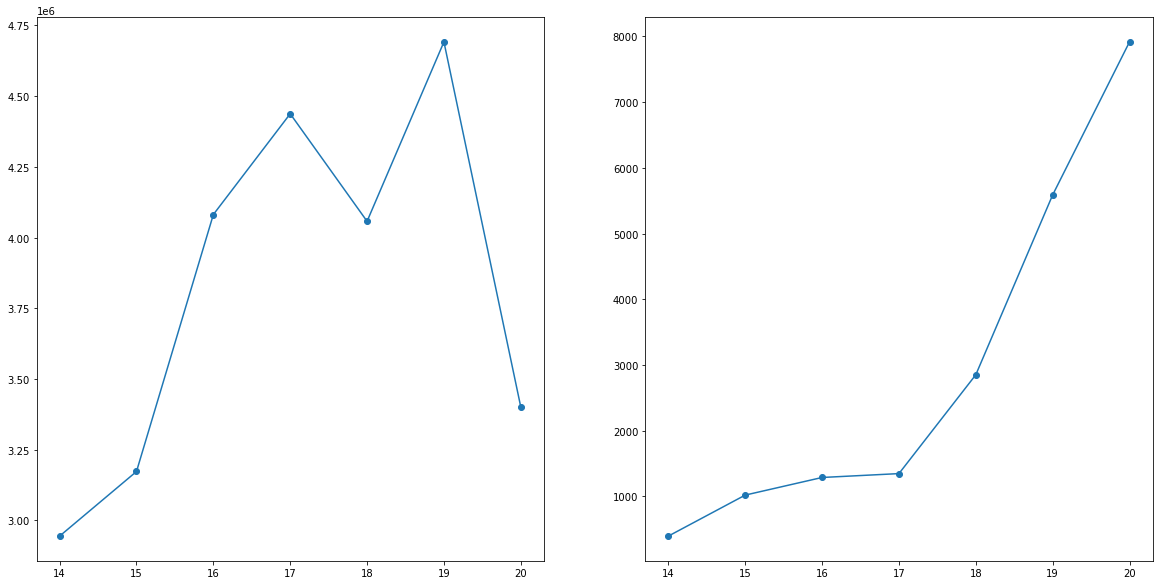

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import multivariate_normal

%matplotlib inline

eje_y = stgo_covid_trans["transacciones"]#trans_covid.query("comuna=='Estación Central'")["transacciones"].values
eje_x = stgo_covid_trans["semana_epi"]#trans_covid.query("comuna=='Estación Central'")["semana_epi"].values

#eje_x1 = #covid_stgo.query("comuna=='Estacion Central'")["semana_epi"].values
eje_y1 = stgo_covid_trans["casos_nuevos"]#covid_stgo.query("comuna=='Estacion Central'")["casos_nuevos"].values

fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(eje_x, eje_y, marker='o')
plt.subplot(1, 2, 2)
plt.plot(eje_x, eje_y1, marker='o')

Lo último es comentar lo pertinente del análisis. No se ha considerado un lapso de tiempo entre la cerificación de los contagios y el contagio real (el transporte público), por lo que el resultado de la ventana de una semana es solo coincidencia. Debido a lo acotado de los datos el resultado no es concluyente.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

Compare el número de defunciones por mes de los últimos 10 años y verifique que las muertes por covid oficiales son coherentes con la variacion de muertes en los años anteriores. 

__Respuesta:__

Lo primero que haremos será importar las defunciones totales del registro civil. *Alerta* Se debe actualizar la variable fecha_act pues el archivo es modificado constantemente este se encuentra en el nombre de la última actulizacion de la carpeta que se encuentra en el siguiente link https://github.com/MinCiencia/Datos-COVID19/tree/master/input/RegistroCivil/Defunciones

In [166]:
import pandas as pd

def_17_20 = []
fecha_act = "2020-01-01_2020-10-31"

def_17_20.append(
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/RegistroCivil/Defunciones/Defunciones_"+fecha_act+"_DO.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

for i in range(2010,2020):
    def_17_20.append(
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/RegistroCivil/Defunciones/Defunciones_"+str(i)+"-01-01_"+str(i)+"-12-31_DO.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

#Se une la información
def_tot = pd.concat(def_17_20)

def_tot

,region,codigo_region,comuna,codigo_comuna,defunciones,fecha
0,Tarapacá,1,Iquique,1101,8,2020-01-02
1,Tarapacá,1,Iquique,1101,7,2020-01-03
2,Tarapacá,1,Iquique,1101,9,2020-01-06
3,Tarapacá,1,Iquique,1101,4,2020-01-07
4,Tarapacá,1,Iquique,1101,8,2020-01-08
...,...,...,...,...,...,...
35892,La Araucanía,9,Victoria,9211,1,2019-12-20
35893,La Araucanía,9,Victoria,9211,3,2019-12-23
35894,La Araucanía,9,Victoria,9211,1,2019-12-24
35895,La Araucanía,9,Victoria,9211,1,2019-12-27


Para reducir la información a la necesaria haremos lo siguiente
1. Definiremos 2 nuevas columnas año y mes
2. Definiremos la columna defunciones con el total de defunciones por region, año y mes
3. Eliminaremos la información irrelevante y reordenaremos la información convenientemente

In [187]:
def_tot2 = (
    
    #Se agregan las columnas año y mes
    def_tot.assign(
        mes = lambda df: df["fecha"].apply(lambda x: int(x.split("-")[1])),
        año = lambda df: df["fecha"].apply(lambda x: int(x.split("-")[0]))
    )
    
    #Se agrupan los datos mediante region, año y mes y se agrega en una columna el número de defunciones totales de cada grupo
    .assign(
        defunciones = lambda df: df.groupby(["region","año","mes"])["defunciones"].transform(lambda x: x.sum())
    )
    
    #Se elimina la información innecesaria
    .drop_duplicates(subset=["region","mes","año"])
    .drop(columns=["fecha","comuna","codigo_comuna","codigo_region"])
    
    #A priori no sabemos esta información, pero los datos de covid están solo en estos meses
    .loc[lambda df: (df["mes"] >= 3) & (df["mes"] <= 10)]
    
    #Se reordena la información de manera conveniente
    .pivot(index=["año","mes"], columns = "region" , values = "defunciones")
)

def_tot2

region    Antofagasta  Arica y Parinacota  Atacama  \
año  mes                                             
2010 3            209                  80      109   
     4            218                  90      100   
     5            246                  89      107   
     6            238                  67      129   
     7            277                 108      131   
...               ...                 ...      ...   
2020 6            492                 132      159   
     7            511                 180      139   
     8            331                 185      184   
     9            310                 168      124   
     10           248                 134      140   

region    Aysén del General Carlos Ibáñez del Campo  Biobío  Coquimbo  \
año  mes                                                                
2010 3                                           43     958       316   
     4                                           37     692       292   
     5                                           37     758       288   
     6                                           43     761       332   
     7                                           47     767       338   
...                                             ...     ...       ...   
2020 6                                           62     926       444   
     7                                           50     992       460   
     8                                           40     998       462   
     9                                           54     995       487   
     10                                          58     933       365   

region    La Araucanía  Libertador General Bernardo O'Higgins  Los Lagos  \
año  mes                                                                   
2010 3             462                                    406        348   
     4             476                                    364        381   
     5             519                                    404        404   
     6             526                                    419        387   
     7             529                                    461        423   
...                ...                                    ...        ...   
2020 6             687                                    681        510   
     7             595                                    731        533   
     8             583                                    608        482   
     9             625                                    522        487   
     10            572                                    512        457   

region    Los Ríos  Magallanes y de la Antártica Chilena  Maule  \
año  mes                                                          
2010 3         217                                    81    740   
     4         219                                    70    435   
     5         221                                    75    514   
     6         234                                    93    515   
     7         232                                    79    571   
...            ...                                   ...    ...   
2020 6         244                                   103    709   
     7         253                                    81    717   
     8         269                                    89    639   
     9         259                                   140    664   
     10        248                                   139    568   

region    Metropolitana de Santiago  Tarapacá  Valparaíso  Ñuble  
año  mes                                                          
2010 3                         2912        99         959    253  
     4                         2838        91         875    247  
     5                         3267       105         964    247  
     6                         3367       103         986    299  
     7                         3694       130        1080    305  
...              

Se importa el archivo con los datos de defunciones por covid y 
1. Se le sacan columnas irrelevantes
2. Se cambian los valores Null de las fechas 

In [188]:
def_covid=(
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto50/DefuncionesDEIS_confirmadosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .drop(columns=["codigo_region","comuna","codigo_comuna","poblacion"])
    .apply(lambda x: x.fillna(0) if x.name[0:4] == "2020" else x.values)
)

def_covid.head()

,region,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,...,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28
0,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0
1,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se trabaja como el dataframe con las defunciones por covid de manera similar. Aplicaremos
1. Definiremos la columna fecha y defunciones para reordenar la información anterior
2. Definiremos al columna mes y año. (Definimos la columna año =20202 para que las formas de los dataframes sean iguales y se más facil operar con ellos)
3. Se define agrega la columna defunciones con la suma de cada agrupación de datos por region y mes
4. Se elimina la información restante y se reordena convenientemente

In [189]:
def_covid2=(
    
    #Se reordena la información en las columnas fecha y defunciones
    def_covid
    .melt( 
        id_vars="region", 
        value_vars= def_covid.columns[1:],
        var_name='fecha', 
        value_name='defunciones')
    
    #Se definen las columnas mes y año
    .assign(
        mes = lambda df: df["fecha"].apply(lambda x: int(x.split("-")[1])),
        año = 20202
    )
    
    #Se definen la columna defunciones calculando la suma de defunciones por cada agrupación de los datos por region y mes
    .assign(
        defunciones = lambda df: df.groupby(["region","mes"])["defunciones"].transform(lambda x: x.sum())
    )
    
    #Se elmina la información innecesaria
    .drop_duplicates(subset=["mes","region","año"])
    .drop(columns=["fecha"])
    
    #Se reordena la información de manera conveniente
    .pivot(index=["año","mes"], columns = "region" , values = "defunciones")
)

def_covid2

region     Antofagasta  Arica y Parinacota  Atacama  Aysen  Biobio  Coquimbo  \
año   mes                                                                      
20202 3            0.0                 0.0      0.0    0.0     2.0       0.0   
      4            7.0                 4.0      0.0    0.0     4.0       0.0   
      5           36.0                 4.0      0.0    0.0     6.0       9.0   
      6          154.0                16.0      5.0    1.0    59.0      22.0   
      7          166.0                45.0      9.0    0.0    57.0      46.0   
      8           90.0                45.0     37.0    0.0   102.0      75.0   
      9           47.0                38.0     20.0    0.0   125.0      66.0   
      10          37.0                31.0     16.0    1.0   127.0      28.0   

region     Del Libertador General Bernardo O’Higgins  La Araucania  Los Lagos  \
año   mes                                                                       
20202 3                                          0.0           7.0        0.0   
      4                                          1.0          32.0       10.0   
      5                                         21.0          12.0        4.0   
      6                                         99.0          15.0       11.0   
      7                                        137.0          13.0       20.0   
      8                                         90.0          17.0       28.0   
      9                                         77.0          23.0       26.0   
      10                                        70.0          38.0       31.0   

region     Los Rios  Magallanes y la Antartica  Maule  Metropolitana  Nuble  \
año   mes                                                                     
20202 3         1.0                        0.0    0.0            6.0    0.0   
      4         2.0                       11.0    9.0          133.0   15.0   
      5         4.0                        9.0   11.0         1803.0    8.0   
      6         4.0                        3.0   68.0         3983.0   17.0   
      7         3.0                        6.0  113.0         1844.0   24.0   
      8         1.0                       15.0   73.0          904.0   19.0   
      9         6.0                       50.0   77.0          679.0   43.0   
      10       10.0                       41.0   70.0          495.0   23.0   

region     Tarapaca  Valparaiso  
año   mes                        
20202 3         0.0         1.0  
      4         0.0        10.0  
      5        31.0        77.0  
      6        85.0       227.0  
      7        59.0       216.0  
      8        34.0       199.0  
      9        25.0       175.0  
      10       10.0       152.0

Se exploran los nombres de las columnas de los dataframes

In [170]:
display(def_covid2.columns,def_tot2.columns)

Index(['Antofagasta', 'Arica y Parinacota', 'Atacama', 'Aysen', 'Biobio',
       'Coquimbo', 'Del Libertador General Bernardo O’Higgins', 'La Araucania',
       'Los Lagos', 'Los Rios', 'Magallanes y la Antartica', 'Maule',
       'Metropolitana', 'Nuble', 'Tarapaca', 'Valparaiso'],
      dtype='object', name='region')

Index(['Antofagasta', 'Arica y Parinacota', 'Atacama',
       'Aysén del General Carlos Ibáñez del Campo', 'Biobío', 'Coquimbo',
       'La Araucanía', 'Libertador General Bernardo O'Higgins', 'Los Lagos',
       'Los Ríos', 'Magallanes y de la Antártica Chilena', 'Maule',
       'Metropolitana de Santiago', 'Tarapacá', 'Valparaíso', 'Ñuble'],
      dtype='object', name='region')

Vemos que el orden no coincide, por lo que operamos para que coincidan 

In [190]:
def_covid2.columns.array[-3] = "Ñuble"
def_tot2.columns.array[7] = "Del libertador"
def_covid2=def_covid2.sort_index(axis=1)
def_tot2=def_tot2.sort_index(axis=1)
def_covid2.columns = def_tot2.columns 
display(def_tot2,
       def_covid2)

region    Antofagasta  Arica y Parinacota  Atacama  \
año  mes                                             
2010 3            209                  80      109   
     4            218                  90      100   
     5            246                  89      107   
     6            238                  67      129   
     7            277                 108      131   
...               ...                 ...      ...   
2020 6            492                 132      159   
     7            511                 180      139   
     8            331                 185      184   
     9            310                 168      124   
     10           248                 134      140   

region    Aysén del General Carlos Ibáñez del Campo  Biobío  Coquimbo  \
año  mes                                                                
2010 3                                           43     958       316   
     4                                           37     692       292   
     5                                           37     758       288   
     6                                           43     761       332   
     7                                           47     767       338   
...                                             ...     ...       ...   
2020 6                                           62     926       444   
     7                                           50     992       460   
     8                                           40     998       462   
     9                                           54     995       487   
     10                                          58     933       365   

region    Del libertador  La Araucanía  Los Lagos  Los Ríos  \
año  mes                                                      
2010 3               406           462        348       217   
     4               364           476        381       219   
     5               404           519        404       221   
     6               419           526        387       234   
     7               461           529        423       232   
...                  ...           ...        ...       ...   
2020 6               681           687        510       244   
     7               731           595        533       253   
     8               608           583        482       269   
     9               522           625        487       259   
     10              512           572        457       248   

region    Magallanes y de la Antártica Chilena  Maule  \
año  mes                                                
2010 3                                      81    740   
     4                                      70    435   
     5                                      75    514   
     6                                      93    515   
     7                                      79    571   
...                                        ...    ...   
2020 6                                     103    709   
     7                                      81    717   
     8                                      89    639   
     9                                     140    664   
     10                                    139    568   

region    Metropolitana de Santiago  Tarapacá  Valparaíso  Ñuble  
año  mes                                                          
2010 3                         2912        99         959    253  
     4                         2838        91         875    247  
     5                         3267       105         964    247  
     6                         3367       103         986    299  
     7                         3694       130        1080    305  
...                             ...       ...         ...    ...  
2020 6                         9197       233        1492    347  
     7                         5631       176        1473    347  
     8                         4312       168        1414    329  
     9                         3721       146   

region     Antofagasta  Arica y Parinacota  Atacama  \
año   mes                                             
20202 3            0.0                 0.0      0.0   
      4            7.0                 4.0      0.0   
      5           36.0                 4.0      0.0   
      6          154.0                16.0      5.0   
      7          166.0                45.0      9.0   
      8           90.0                45.0     37.0   
      9           47.0                38.0     20.0   
      10          37.0                31.0     16.0   

region     Aysén del General Carlos Ibáñez del Campo  Biobío  Coquimbo  \
año   mes                                                                
20202 3                                          0.0     2.0       0.0   
      4                                          0.0     4.0       0.0   
      5                                          0.0     6.0       9.0   
      6                                          1.0    59.0      22.0   
      7                                          0.0    57.0      46.0   
      8                                          0.0   102.0      75.0   
      9                                          0.0   125.0      66.0   
      10                                         1.0   127.0      28.0   

region     Del libertador  La Araucanía  Los Lagos  Los Ríos  \
año   mes                                                      
20202 3               0.0           7.0        0.0       1.0   
      4               1.0          32.0       10.0       2.0   
      5              21.0          12.0        4.0       4.0   
      6              99.0          15.0       11.0       4.0   
      7             137.0          13.0       20.0       3.0   
      8              90.0          17.0       28.0       1.0   
      9              77.0          23.0       26.0       6.0   
      10             70.0          38.0       31.0      10.0   

region     Magallanes y de la Antártica Chilena  Maule  \
año   mes                                                
20202 3                                     0.0    0.0   
      4                                    11.0    9.0   
      5                                     9.0   11.0   
      6                                     3.0   68.0   
      7                                     6.0  113.0   
      8                                    15.0   73.0   
      9                                    50.0   77.0   
      10                                   41.0   70.0   

region     Metropolitana de Santiago  Tarapacá  Valparaíso  Ñuble  
año   mes                                                          
20202 3                          6.0       0.0         1.0    0.0  
      4                        133.0       0.0        10.0   15.0  
      5                       1803.0      31.0        77.0    8.0  
      6                       3983.0      85.0       227.0   17.0  
      7                       1844.0      59.0       216.0   24.0  
      8                        904.0      34.0       199.0   19.0  
      9                        679.0      25.0       175.0   43.0  
      10                       495.0      10.0       152.0   23.0

Para contrastar la información primero agruparemos la infromación de ambos dataframes para luego
1. Calcular el número de muertes que no está registradas como covid en el año 2020
2. Calcular la diferencia entre el número de muertes de cada año con la diferencia de muertes del 2020 que no fueron causadas por covid
3. Por último reodenaremos la infromación de manera conveniente

In [220]:
def_tot_covid = pd.concat([def_tot2,def_covid2])

def_tot_covid = (
    
    #Se reordena la información de manera conveniente
    def_tot_covid
    .T
    
    # Se calcula el número que no estan registradas por covid
    .apply(lambda x: x-def_tot_covid.T[(20202,x.name[1])] if x.name[0] == 2020 else x.values)
    
    #Se calcula la diferencia entre el número de muertes de cada año con las muertes que no está registradas por covid 
    .apply(lambda x: def_tot_covid.T[(2020,x.name[1])]-x if (x.name[0] != 2020) & (x.name[0] != 20202) else x.values)
    
    #Se reordena la información de manera conveniente
    .T.reset_index()
)


def_tot_covid


region,año,mes,Antofagasta,Arica y Parinacota,Atacama,Aysén del General Carlos Ibáñez del Campo,Biobío,Coquimbo,Del libertador,La Araucanía,Los Lagos,Los Ríos,Magallanes y de la Antártica Chilena,Maule,Metropolitana de Santiago,Tarapacá,Valparaíso,Ñuble
0,2010,3,43.0,46.0,15.0,6.0,-53.0,43.0,49.0,74.0,55.0,25.0,11.0,-229.0,324.0,45.0,129.0,33.0
1,2010,4,42.0,26.0,14.0,9.0,162.0,81.0,72.0,134.0,56.0,-7.0,38.0,130.0,491.0,16.0,221.0,37.0
2,2010,5,27.0,6.0,23.0,-4.0,50.0,53.0,58.0,23.0,20.0,-7.0,33.0,62.0,2396.0,51.0,234.0,31.0
3,2010,6,254.0,65.0,30.0,19.0,165.0,112.0,262.0,161.0,123.0,10.0,10.0,194.0,5830.0,130.0,506.0,48.0
4,2010,7,234.0,72.0,8.0,3.0,225.0,122.0,270.0,66.0,110.0,21.0,2.0,146.0,1937.0,46.0,393.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,20202,6,154.0,16.0,5.0,1.0,59.0,22.0,99.0,15.0,11.0,4.0,3.0,68.0,3983.0,85.0,227.0,17.0
92,20202,7,166.0,45.0,9.0,0.0,57.0,46.0,137.0,13.0,20.0,3.0,6.0,113.0,1844.0,59.0,216.0,24.0
93,20202,8,90.0,45.0,37.0,0.0,102.0,75.0,90.0,17.0,28.0,1.0,15.0,73.0,904.0,34.0,199.0,19.0
94,20202,9,47.0,38.0,20.0,0.0,125.0,66.0,77.0,23.0,26.0,6.0,50.0,77.0,679.0,25.0,175.0,43.0


Primero agruparemos la infromación por el promedio de la diferencia de muertes de cada año. Para esto
1. Eliminaremos la información del 2020 y del 20202 (información muertes covid)
2. Agruparemos por región y año para calcular el promedio de las defunciones en cada uno 
3. Reordenaremos la infromación y la graficaremos

In [222]:
prom_reg_año = (
    
    #Se elimina la infromación covid y del 2020
    def_tot_covid.loc[(def_tot_covid["año"] != 20202) & (def_tot_covid["año"] != 2020)]
    .melt( 
        id_vars = ["año","mes"], 
        value_vars = prueba.columns[3:],
        var_name = 'region', 
        value_name = 'defunciones')
    
    #Se agrupa por region y año para caluar el promedio de cada grupo
    .groupby(["region","año"])
    .agg(
        prom_reg_año = ("defunciones","mean"),
    )
    .reset_index()
)

import altair as alt

alt.Chart(prom_reg_año).mark_line().encode(
    x = "año",
    y = "prom_reg_año",
    color = "region",
    tooltip=['region', 'prom_reg_año']
).interactive()

alt.Chart(...)

Ahora obtendremos información a a nivel nacional. Para esto
1. Eliminaremos la información del 2020 y del 20202 (información covid)
2. Reordenaremos la infromación definiendo las columnas region y defunciones
3. Definimos la columna def_mes_nac como la suma de las defunciones de cada agrupación realizada mediante años y mes
4. Se grafica la información

In [374]:
def_mes_nac=(
    
    #Se elimina la información del 2020 y 20202
    def_tot_covid.loc[(def_tot_covid["año"] != 20202) & (def_tot_covid["año"] != 2020)]
    
    #Se definen las columnas región y fecha 
    .melt( 
        id_vars = ["año","mes"], 
        value_vars = prueba.columns[3:],
        var_name = 'region', 
        value_name = 'defunciones')
    
    #Se define la columna def_mes_nac
    .assign(
        def_mes_nac = lambda df: df.groupby(["año","mes"])["defunciones"].transform(lambda x: x.sum())
    )
    
    #Se elimina la información sobrante
    .drop_duplicates(subset=["año","mes"])
    .drop(columns=["region", "defunciones"])

)

alt.Chart(def_mes_nac).mark_line().encode(
    x = "mes",
    y = "def_mes_nac",
    color = "año:N",
    tooltip=['año', 'def_mes_nac']
).interactive()

#prueba3.loc[prueba3["año"]==2010]


alt.Chart(...)

Por último graficaremos la suma de la diferencia entre las muertes que no fueron causadas por covid el año 2020 y las muertes de cada año entre 2010 y 2019

In [378]:
df = ( 
    def_mes_nac.pivot(index=["mes"], columns = ["año"] , values = "def_mes_nac")
    .cumsum()
    .reset_index()
)        

df = df.melt( 
        id_vars = "mes", 
        value_vars = df.columns[1:],
        var_name = 'año', 
        value_name = 'def_nac_ac')

alt.Chart(df).mark_line().encode(
    x = "mes",
    y = "def_nac_ac",
    color = "año:N",
    tooltip=['año', 'def_nac_ac']
).interactive()

alt.Chart(...)

Se puede ver por simple inspección que la información no es coherente, pues existe una acumulación de al menos 10.000 muertes que no han sido notificadas en el año.